In [1]:
import pandas as pd
%pip install openpyxl

/tmp/ipykernel_8121/2946574912.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [2]:
df_2014_1 = pd.read_csv('DATA/Adopciones_Ene_Jun_2014.csv')
df_2014_2 = pd.read_csv('DATA/Adopciones_Jul_Dic_2014.csv')

df_2015_1 = pd.read_csv('DATA/Adopciones_Ene_Jun_2015.csv')
df_2015_2 = pd.read_csv('DATA/Adopciones_Jul_Dic_2015.csv')

df_2016_1 = pd.read_csv('DATA/Adopciones_Ene_Jun_2016.csv')
df_2016_2 = pd.read_excel('DATA/Adopciones_Jul_Dic_2016.xlsx')

df_2017_1 = pd.read_excel('DATA/Adopciones_Ene_Jun_2017.xlsx')
df_2017_2 = pd.read_excel('DATA/Adopciones_Jul_Dic_2017.xlsx')

df_2018_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2018.xlsx')
df_2018_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2018.xlsx')

df_2019_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2019.xlsx')
df_2019_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2019.xlsx')

df_2020_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2020.xlsx')
df_2020_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2020.xlsx')

df_2021_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2021.xlsx')
df_2021_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2021.xlsx')

df_2022_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2022.xlsx')
df_2022_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2022.xlsx')

df_2023_1 =  pd.read_excel('DATA/Adopciones_Ene_Jun_2023.xlsx')
df_2023_2 =  pd.read_excel('DATA/Adopciones_Jul_Dic_2023.xlsx')


In [3]:
dataframes = [df_2014_1,df_2014_2,df_2015_1,df_2015_2,df_2016_1,df_2016_2,df_2017_1,df_2017_2,df_2018_1,df_2018_2,df_2019_1,df_2019_2,df_2020_1,df_2020_2,df_2021_1,df_2021_2,df_2022_1,df_2022_2,df_2023_1,df_2023_2]
df_general = pd.concat(dataframes, ignore_index=True, sort=False)

In [4]:
def generate_year(period):
    try: 
        return int(period.split()[1])
    except ValueError:
        try:
            return int(period.split()[2])
        except ValueError:
            return int(period.split()[3])

In [5]:
def generate_semester(period):
    if period[:2]== 'En':
        return 1
    else:
        return 2

In [6]:
df_general['Year'] = df_general['Periodo'].apply(lambda x: generate_year(x))
df_general['Semestre'] = df_general['Periodo'].apply(lambda x: generate_semester(x))

In [7]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 36 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Reporte Semestral de Adopción                                                            40 non-null     object 
 1   Periodo                                                                                  40 non-null     object 
 2   Institución Encargada del Trámite                                                        40 non-null     object 
 3   Solicitudes Recibidas                                                                    40 non-null     int64  
 4   Solicitudes  en Trámite                                                                  40 non-null     int64  
 5   Adopciones Improcedentes                                          

In [8]:
%pip install upsetplot
%pip install missingno
%run pandas-missing-extension.ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<Axes: >

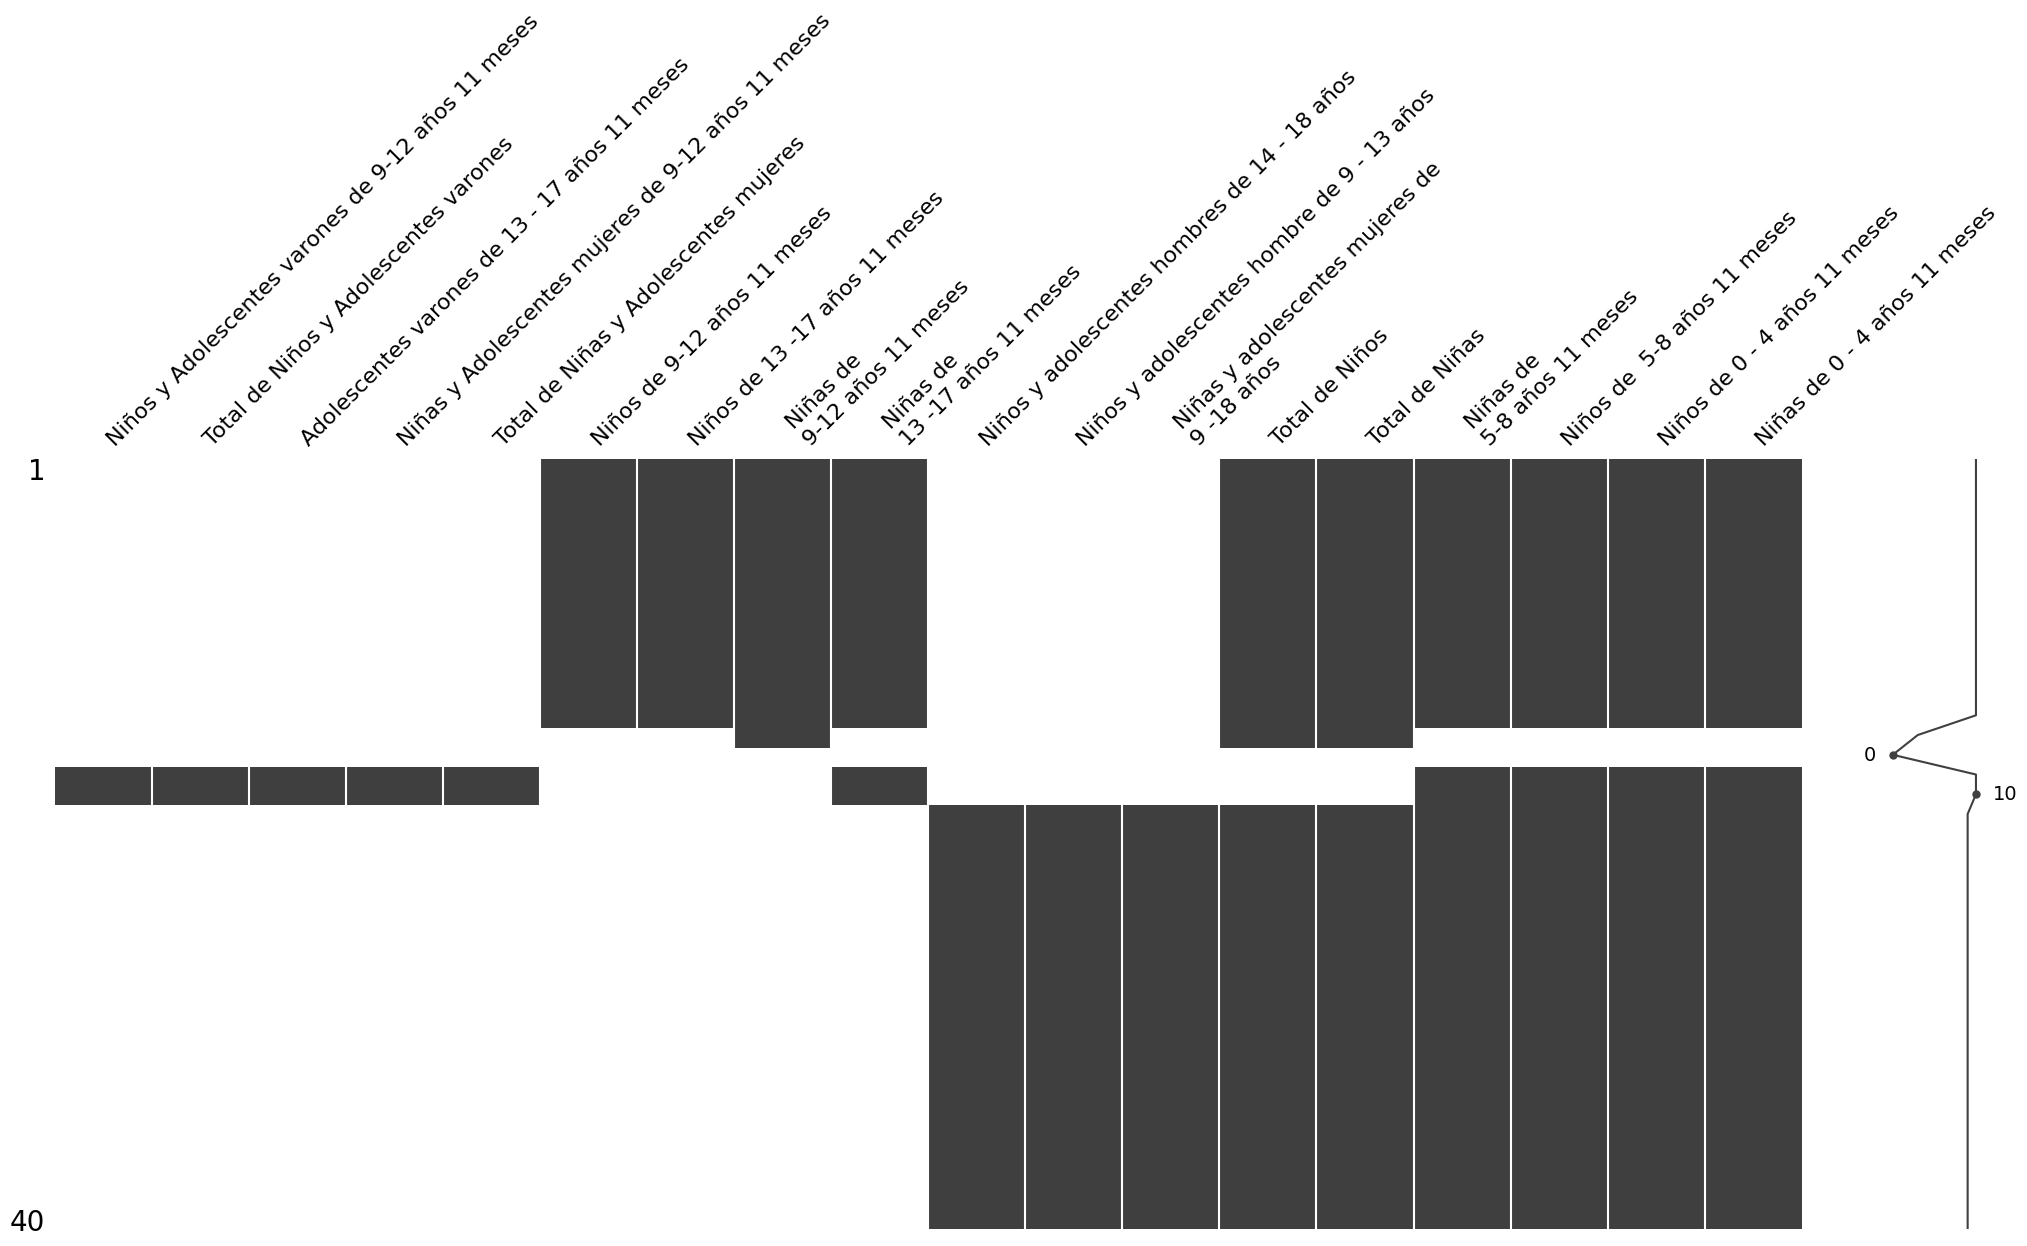

In [9]:
%run pandas-missing-extension.ipynb
import missingno
(
    df_general[['Niñas de 0 - 4 años 11 meses', 'Niñas de \n5-8 años 11 meses',
       'Niñas de  \n9-12 años 11 meses', 'Niñas de \n13 -17 años 11 meses',
       'Total de Niñas', 'Niños de 0 - 4 años 11 meses',
       'Niños de  5-8 años 11 meses', 'Niños de 9-12 años 11 meses',
       'Niños de 13 -17 años 11 meses', 'Total de Niños','Niñas y Adolescentes mujeres de 9-12 años 11 meses',
       'Total de Niñas y Adolescentes mujeres',
       'Niños y Adolescentes varones de 9-12 años 11 meses',
       'Adolescentes varones de 13 - 17 años 11 meses',
       'Total de Niños y Adolescentes varones','Niñas y adolescentes mujeres de  \n9 -18 años',
       'Niños y adolescentes hombre de 9 - 13 años ',
       'Niños y adolescentes hombres de 14 - 18 años ']]
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

In [10]:
values_missing = df_general[['Niñas de 0 - 4 años 11 meses', 'Niñas de \n5-8 años 11 meses',
       'Niñas de  \n9-12 años 11 meses', 'Niñas de \n13 -17 años 11 meses',
       'Total de Niñas', 'Niños de 0 - 4 años 11 meses',
       'Niños de  5-8 años 11 meses', 'Niños de 9-12 años 11 meses',
       'Niños de 13 -17 años 11 meses', 'Total de Niños','Niñas y Adolescentes mujeres de 9-12 años 11 meses',
       'Total de Niñas y Adolescentes mujeres',
       'Niños y Adolescentes varones de 9-12 años 11 meses',
       'Adolescentes varones de 13 - 17 años 11 meses',
       'Total de Niños y Adolescentes varones','Niñas y adolescentes mujeres de  \n9 -18 años',
       'Niños y adolescentes hombre de 9 - 13 años ',
       'Niños y adolescentes hombres de 14 - 18 años ']]

In [11]:
columns_duplicated = {
    'Niñas y adolescentes mujeres de  \n9 -18 años':['Niñas de \n13 -17 años 11 meses', 'Niñas de  \n9-12 años 11 meses', 'Niñas y Adolescentes mujeres de 9-12 años 11 meses'],
    'Niños y adolescentes hombre de 9 - 13 años ':['Niños de 9-12 años 11 meses','Niños y Adolescentes varones de 9-12 años 11 meses' ], 
    'Niños y adolescentes hombres de 14 - 18 años ':[ 'Niños de 13 -17 años 11 meses', 'Adolescentes varones de 13 - 17 años 11 meses'], 
    'Total de Niños':['Total de Niños y Adolescentes varones'], 
    'Total de Niñas':['Total de Niñas y Adolescentes mujeres'],
    'Adopciones Concedidas': ['Adopciones concluidas'],
    'Estado de Receptor':['Estado de Recepción'],
    'Adopciones Concedidas':['Adopciones concluidas'],
    'Adopciones Improcedentes': ['Solicitudes de adopción con resolución sobre la improcedencia']
}

In [12]:
new_data ={}
for original_columns in columns_duplicated:
    for column in columns_duplicated[original_columns]:
        hola = df_general[[original_columns, column]].loc[(df_general[original_columns].isna()) & (df_general[column].notnull())]
        if len(hola[column].values) > 0:
            name = "{}:{}".format(original_columns, column)
            new_data[name] = {
                'ndata': hola[column].values,
                'index': hola.index
            }

In [13]:
for data in new_data:
    column = data.split(':')[0]
    for index in new_data[data]['index']:
        for ndata in new_data[data]['ndata']:
            df_general.at[index, column] = ndata

/tmp/ipykernel_8121/962389605.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No aplica' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_general.at[index, column] = ndata


<Axes: >

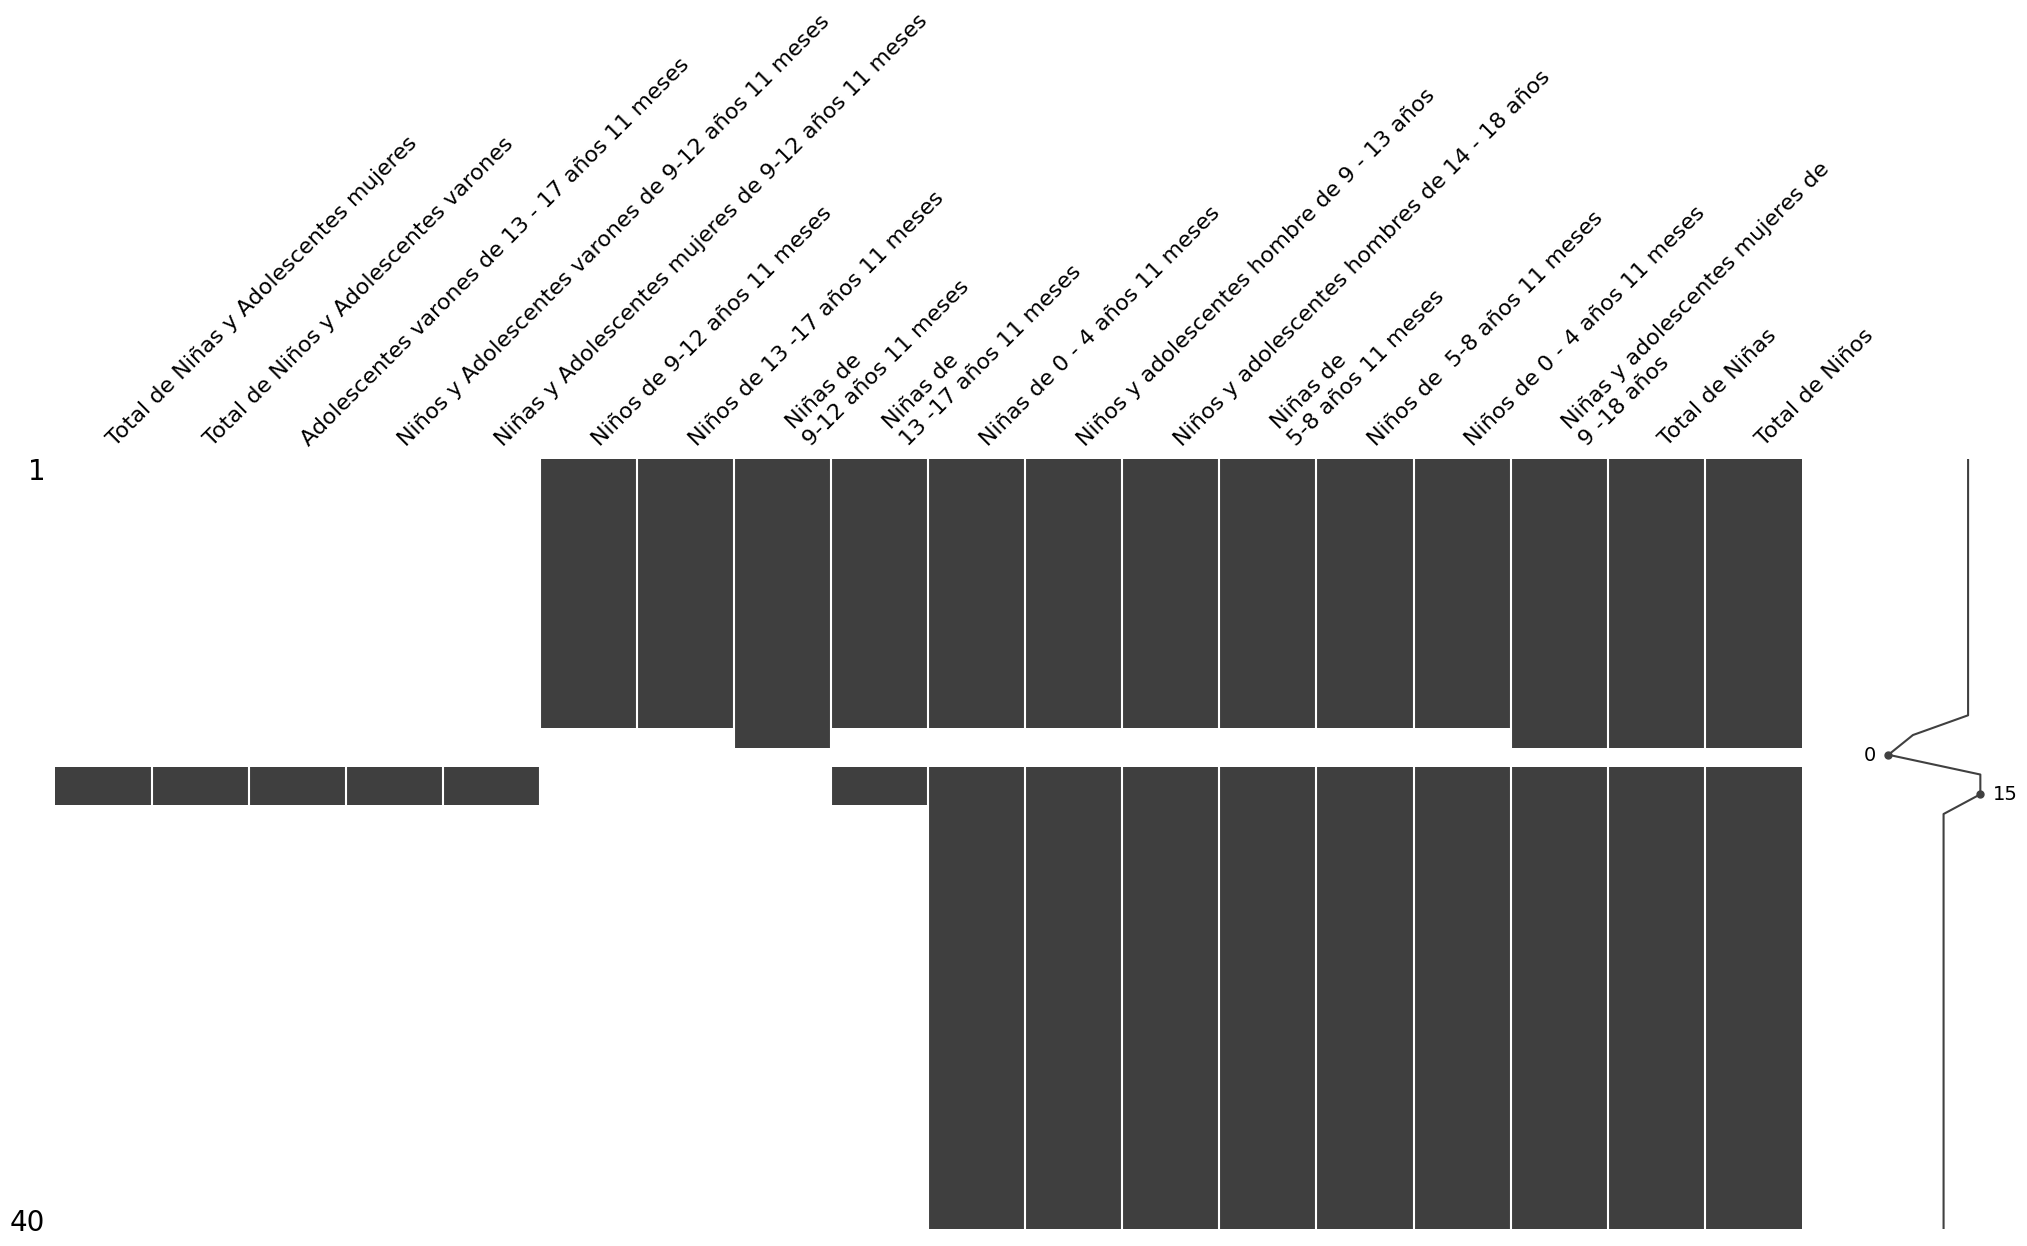

In [14]:
(
    df_general[['Niñas de 0 - 4 años 11 meses', 'Niñas de \n5-8 años 11 meses',
       'Niñas de  \n9-12 años 11 meses', 'Niñas de \n13 -17 años 11 meses',
       'Total de Niñas', 'Niños de 0 - 4 años 11 meses',
       'Niños de  5-8 años 11 meses', 'Niños de 9-12 años 11 meses',
       'Niños de 13 -17 años 11 meses', 'Total de Niños','Niñas y Adolescentes mujeres de 9-12 años 11 meses',
       'Total de Niñas y Adolescentes mujeres',
       'Niños y Adolescentes varones de 9-12 años 11 meses',
       'Adolescentes varones de 13 - 17 años 11 meses',
       'Total de Niños y Adolescentes varones','Niñas y adolescentes mujeres de  \n9 -18 años',
       'Niños y adolescentes hombre de 9 - 13 años ',
       'Niños y adolescentes hombres de 14 - 18 años ']]
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

In [15]:
delete_columns = ['Niñas de \n13 -17 años 11 meses', 'Niñas de  \n9-12 años 11 meses', 'Niñas y Adolescentes mujeres de 9-12 años 11 meses',
                 'Niños de 9-12 años 11 meses','Niños y Adolescentes varones de 9-12 años 11 meses', 'Niños de 13 -17 años 11 meses', 'Adolescentes varones de 13 - 17 años 11 meses',
                  'Total de Niños y Adolescentes varones', 'Total de Niñas y Adolescentes mujeres', 'Unnamed: 21', 'Adopciones concluidas',
                  'Estado de Recepción', 'Solicitudes de adopción con resolución sobre la improcedencia', 'Adopciones concluidas', 
                 ]

In [16]:
df = df_general.drop(delete_columns, axis =1)

In [17]:
df.isna().sum()

Reporte Semestral de Adopción                                                               0
Periodo                                                                                     0
Institución Encargada del Trámite                                                           0
Solicitudes Recibidas                                                                       0
Solicitudes  en Trámite                                                                     0
Adopciones Improcedentes                                                                    0
Adopciones Concedidas                                                                       0
Femenino                                                                                    1
Masculino                                                                                   1
Niñas de 0 - 4 años 11 meses                                                                2
Niñas de \n5-8 años 11 meses                                

In [18]:
df.columns

Index(['Reporte Semestral de Adopción ', 'Periodo',
       'Institución Encargada del Trámite', 'Solicitudes Recibidas',
       'Solicitudes  en Trámite', 'Adopciones Improcedentes',
       'Adopciones Concedidas', 'Femenino', 'Masculino ',
       'Niñas de 0 - 4 años 11 meses', 'Niñas de \n5-8 años 11 meses',
       'Total de Niñas', 'Niños de 0 - 4 años 11 meses',
       'Niños de  5-8 años 11 meses', 'Total de Niños', 'Estado de Origen ',
       'Estado de Receptor',
       'Solicitudes de adopción con resolución sobre la no emisión del Certificado de Idoneidad',
       'Niñas y adolescentes mujeres de  \n9 -18 años',
       'Niños y adolescentes hombre de 9 - 13 años ',
       'Niños y adolescentes hombres de 14 - 18 años ', 'Year', 'Semestre'],
      dtype='object')

In [20]:
df.rename(columns={
    'Reporte Semestral de Adopción ': 'Reporte',
    'Institución Encargada del Trámite': 'Institucion', 
    'Niñas de 0 - 4 años 11 meses': '0-4y F', 
    'Niñas de \n5-8 años 11 meses': '5-8y F',
    'Total de Niñas': 'Total F',
    'Niños de 0 - 4 años 11 meses': '0-4y M',
    'Niños de  5-8 años 11 meses': '5-8y M', 
    'Total de Niños': 'Total M', 
    'Estado de Origen ': 'Origen',
    'Estado de Receptor': 'Receptor',
    'Niñas y adolescentes mujeres de  \n9 -18 años': '9-18y F',
    'Niños y adolescentes hombre de 9 - 13 años ': '9-13y M',
    'Niños y adolescentes hombres de 14 - 18 años ': '14-18 M'
    }, inplace = True)

In [22]:
df.to_csv('DATA/Adopciones.csv', index=False)